In [1]:
import numpy as np

# Load only the necessary columns using 0-based indexing
# AT (column 0), AFDP (column 3), CDP (column 8), CO (column 9), NOx (column 10)
data = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/gt_2015.csv', skip_header=1, delimiter=',', usecols=(0, 3, 8, 9, 10))

# Clean the data (remove rows with missing values)
data_clean = data#[~np.isnan(data).any(axis=1)]

# Extract the response variables (Y): CO (column 3) and NOx (column 4)
Y = data_clean[:, [3, 4]]

# Extract the predictor variables (X) and add a column of ones for the intercept
X = np.hstack((np.ones((data_clean.shape[0], 1)), data_clean[:, [0, 1, 2]]))  # Columns: AT, AFDP, CDP

# Print the shapes of X and Y to ensure they match
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (7384, 4)
Shape of Y: (7384, 2)


In [2]:
# Compute the closed-form solution: B_e = (X.T X)^(-1) X.T Y
Be = np.linalg.inv(X.T @ X) @ X.T @ Y

# Calculate the Mean Squared Error (MSE)
MSEe = (1/2/7384)* np.sum((Y - (X @ Be))**2)

# Print the results
print("Closed-form solution (Be):\n", Be)
print("Mean Squared Error (MSE) using closed-form solution:", MSEe)


Closed-form solution (Be):
 [[ 1.82062030e+01  9.44003663e+01]
 [-8.17120882e-02 -5.56205201e-01]
 [ 2.12898746e-01 -7.48933496e+00]
 [-1.19326108e+00  1.67343419e-01]]
Mean Squared Error (MSE) using closed-form solution: 34.05824838181543


In [3]:
# Set hyperparameters
learning_rate = 17e-8  # You can experiment with this value if needed
epochs = 10000  # Number of iterations

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Initialize array to store MSE at each epoch
MSE = np.zeros(epochs)

# Perform gradient descent
for epoch in range(epochs):
    # Compute the gradient and update the parameters
    B += learning_rate * X.T @ (Y - X @ B)

    # Compute the MSE for the current iteration
    MSE[epoch] = (1 / (Y.shape[1] * Y.shape[0])) * np.sum((Y - (X @ B))**2)

# Print final parameters and MSE after the last epoch
print("Final parameter matrix (B) after gradient descent:\n", B)
print("Final MSE after gradient descent:", MSE[-1])


Final parameter matrix (B) after gradient descent:
 [[ 1.52531316e+00  9.89002729e+00]
 [-1.66625482e-02 -3.12077676e-01]
 [-2.68774403e+00 -1.82914434e+01]
 [ 9.48764548e-01  9.97564299e+00]]
Final MSE after gradient descent: 51.02129865875435


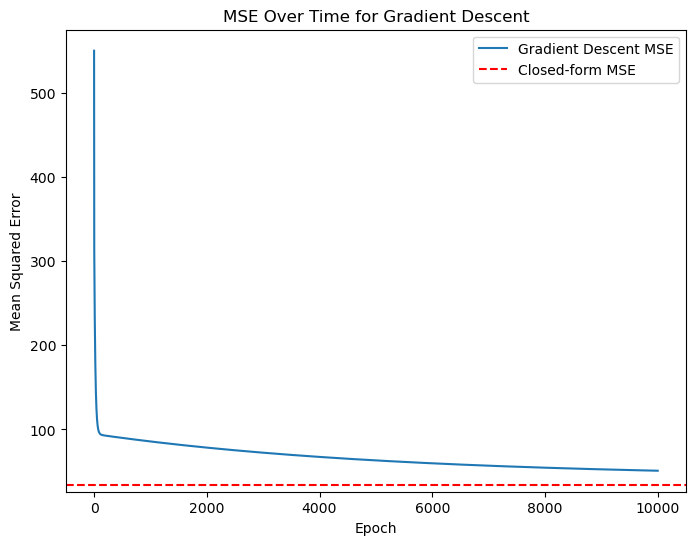

In [4]:
import matplotlib.pyplot as plt

# Plot the MSE for gradient descent
plt.figure(figsize=(8, 6))
plt.plot(MSE, label='Gradient Descent MSE')

# Plot a horizontal line for the closed-form MSE for comparison
plt.axhline(y=MSEe, color='r', linestyle='--', label='Closed-form MSE')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Time for Gradient Descent')
plt.legend()

# Show the plot
plt.show()
